<a href="https://colab.research.google.com/github/MtHenriqueF/GA-Rastrigin-1/blob/configuracoes-diversas/GA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Montando Drive

In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
import os

WORKDIR = '/content/drive/MyDrive/GA'

os.chdir(WORKDIR)
print('Diretório atual:', os.getcwd())


Diretório atual: /content/drive/MyDrive/GA


---
# Enunciado

O problema para o segundo trabalho de GA é definido pela função Rastrigin [1] é uma função
não convexa usada como um problema de teste de desempenho para algoritmos de
otimização.

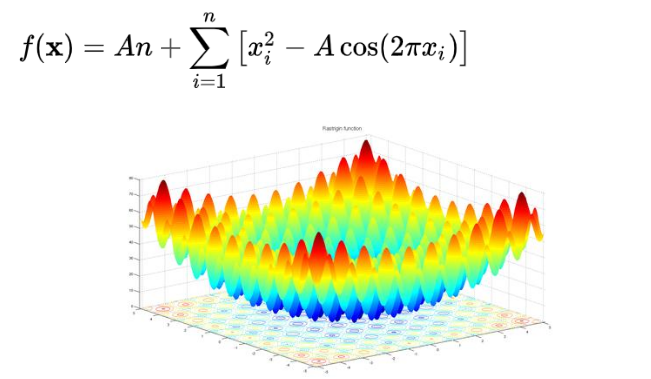

In [51]:
path = '/content/drive/MyDrive/GA/GA.png'
from PIL import Image
Image.open(path)


- **O objetivo é avaliar e testar todos os parâmetros do Algoritmo Genético para encontrar a função de mínimo para o problema no menor tempo possível, ou seja, com a menor quantidade de gerações.** O código em Python desenvolvido a partir da biblioteca *geneticalgorithm2* também está disponível.

- Fundamental, a inclusão de **tabelas que descrevam os parâmetros e valores avaliados desses parâmetros**, além dos resultados obtidos nos testes. Os **gráficos** devem ser anexados para justificar as respostas.

- Também recomendo que não alterem mais de um parâmetro por vez para evitar avaliações indevidas. Fundamental que façam comentários a respeito dos resultados obtidos!

---
# Informações sobre o trabalho

- Biblioteca do trabalho2
[geneticalgorithm2](https://pypi.org/project/geneticalgorithm2)

- Parâmetros do GA
[parametros-ga](https://github.com/PasaOpasen/geneticalgorithm2)


- Informação funções matemáticas
  - https://github.com/PasaOpasen/OptimizationTestFunctions#rastrigin
  - https://github.com/PasaOpasen/geneticalgorithm2

- Outra biblioteca de GA.
https://pypi.org/project/deap/

---
## Estrutura global do algoritmo - segundo biblioteca

```python
# Pre-process: making inner functions depends on params, making/loading start population

while True:

    if reason to stop (time is elapsed / no progress / generation count is reached / min value is reached):
        break


    select parents to crossover from last population and put them to new population:
        select (elit count) best samples
        select (parents count - elit count) random samples (by selection function)

    create (total samples count - parents count) children (samples from selected parents) and put them to new population:
        while not all children are created:
            select 2 random parents
            make child1, child2 from them using crossover
            mutate child1 by mutation (model.mut)
            mutate child2 by middle mutation (model.mut_middle)
            put children to new population
    
    remove duplicates, make revolutions, sort population by scores
    use callbacks, use middle callbacks

# Post-process: plotting results, saving
```

---
# Instalando dependências

In [52]:
!pip install geneticalgorithm2

In [53]:
!pip install geneticalgorithm2[full]

---
# Interpretando enunciado e definindo os parâmetros essenciais

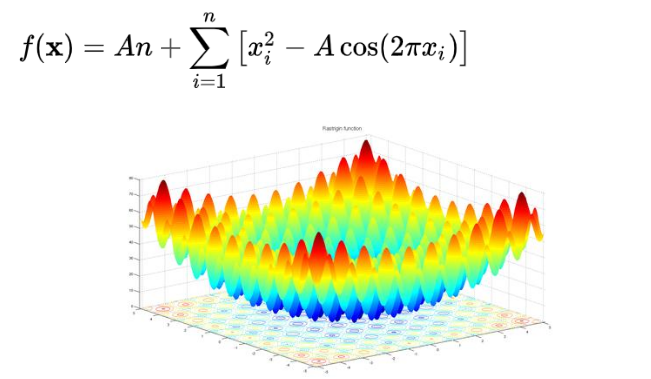

In [54]:
path = '/content/drive/MyDrive/GA/GA.png'
from PIL import Image
Image.open(path)


O enunciado pede para minimizar a funcão e o seu gráfico é 3D e F(x) tem dimensão 1A, então a dimensão de x é 2 ou seja, nossos cromossomos tem 2 'casas' reais.

Com base no enunciado e sabendo que x não tem restrições podemos também escrever a funcão que define a nossa avaliação, que será normalizada e virará aptidao.

O valor padrão e universalmente aceito para o parâmetro A na função de Rastrigin é 10. Portanto podemos definir a funcão de avaliação para nosso problema:


In [55]:
A = 10
n = 2

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from geneticalgorithm2 import GeneticAlgorithm2 as ga

A = 10

def rastrigin_function(X):
    n_dim = len(X)
    termo_quadratico = np.sum(X**2)
    termo_cosseno = np.sum(A * np.cos(2 * np.pi * X))
    return A * n_dim + termo_quadratico - termo_cosseno


Por definição x de [Rastrigin](https://en.wikipedia.org/wiki/Rastrigin_function)
varia entre [-5.12, 5.12] então já podemos definir varbound também


In [57]:
varbound = np.array([[-5.12, 5.12]] * n)

Além disso, variable_type='real', por definição também.


---
# Exemplificando com 1 experimento

Somento para efeitos de exemplificação da biblioteca geneticalgorithm2 para 1 experimento.

Iniciando o Algoritmo Genético...

Set: Average time of function evaluating (secs): 1.7936229705810548e-05 (total = 0.0035872459411621094)

Best score before optimization: 0.7703291419755658
|||_________________ 14.2% GA is running...17 gen from 120...best value = 0.7703291419755658

/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:189: UserWarning: crossover_probability is deprecated and will be removed in version 7. Reason: it's old and has no sense
  warnings.warn(
/usr/local/lib/python3.12/dist-packages/geneticalgorithm2/geneticalgorithm2.py:197: UserWarning: function is deprecated in init constructor and will be removed in version 7. Move this argument to run() method
  warnings.warn(


                                                                                                                                                                                                        
 The best found solution:
 [0.00223032 0.01316588]

 Objective function:
 0.035356704919617954

 Used generations: 120
 Used time: 1.41 seconds


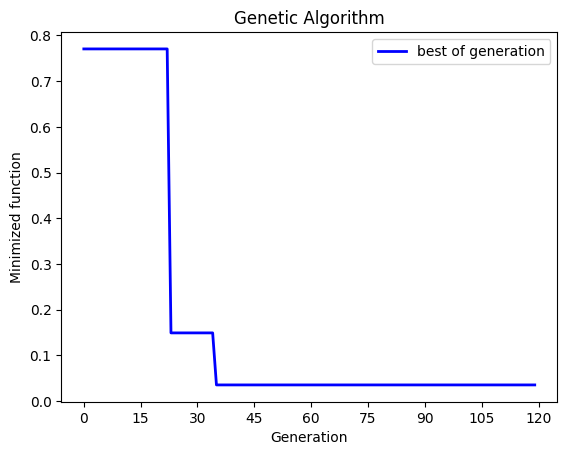

GAResult(last_generation=Generation(variables=array([[ 2.23031651e-03,  1.31658803e-02],
       [-1.67346791e-02,  1.43595449e-03],
       [-1.55226184e-02,  1.44140649e-02],
       [ 2.23031651e-03,  2.17431871e-02],
       [-1.67346791e-02,  1.44140649e-02],
       [ 2.23031651e-03,  2.46789015e-02],
       [-1.67346791e-02,  2.17431871e-02],
       [-1.55226184e-02,  2.46789015e-02],
       [-1.67346791e-02,  2.46789015e-02],
       [ 3.32365354e-02,  1.79000374e-02],
       [-4.03167263e-02,  1.31658803e-02],
       [-4.03167263e-02,  1.44140649e-02],
       [-4.03167263e-02,  1.58729201e-02],
       [-4.03167263e-02, -1.76290301e-02],
       [-4.03167263e-02,  2.17431871e-02],
       [-4.03167263e-02,  2.46789015e-02],
       [-1.55226184e-02,  5.28964045e-02],
       [-1.67346791e-02,  5.28964045e-02],
       [-1.67346791e-02,  5.32504211e-02],
       [-5.75391171e-02,  1.43595449e-03],
       [-5.75391171e-02,  1.31658803e-02],
       [-5.75391171e-02,  1.58729201e-02],
       [

In [58]:
import numpy as np
from geneticalgorithm2 import GeneticAlgorithm2 as ga
from geneticalgorithm2 import Selection

A = 10
n = 2

varbound = np.array([[-5.12, 5.12]] * n)

# CONFIGURAÇÃO DOS PARÂMETROS DO ALGORITMO GENÉTICO

algorithm_param = {
    'max_num_iteration': 120,                #Número de gerações
    'population_size': 200,                 #Tamanho da população

    'mutation_probability': 0.01,           #Probabilidade de mutação de 1%
    'mutation_type': 'gauss_by_x',          #Tipo de mutação 'gaussian' (creep)

    'crossover_probability': 0.65,          #Probabilidade de crossover de 65%
    'crossover_type': 'uniform',            #Tipo de crossover 'uniform'

    'elit_ratio': 0.10,                     #10% de elitismo (steady state)
    'parents_portion': 0.9,                 #90% da população pode ser selecionada como pais

    'selection_type': 'tournament',         #Seleção por torneio
}

model = ga(
    dimension=n,
    variable_type='real',
    variable_boundaries=varbound,
    algorithm_parameters=algorithm_param,
    function=rastrigin_function
)

#Executando o algoritmo genético
#O parâmetro para remover duplicatas é passado no método run()

print("Iniciando o Algoritmo Genético...")
model.run(
    remove_duplicates_generation_step=1 #Remove duplicatas a cada 1 geração ("Sem duplicatas")
)



### valor de $(x, y, f(x,y))$ para melhor solução

In [59]:

solution = model.result

print(f"Melhor Score (Valor da Função): {solution.score}")
print(f"Melhor Solução (Vetor X): {solution.variable}")


Melhor Score (Valor da Função): 0.035356704919617954
Melhor Solução (Vetor X): [0.00223032 0.01316588]


### Solução para cada geração e o melhor resultado

In [60]:
solution

GAResult(last_generation=Generation(variables=array([[ 2.23031651e-03,  1.31658803e-02],
       [-1.67346791e-02,  1.43595449e-03],
       [-1.55226184e-02,  1.44140649e-02],
       [ 2.23031651e-03,  2.17431871e-02],
       [-1.67346791e-02,  1.44140649e-02],
       [ 2.23031651e-03,  2.46789015e-02],
       [-1.67346791e-02,  2.17431871e-02],
       [-1.55226184e-02,  2.46789015e-02],
       [-1.67346791e-02,  2.46789015e-02],
       [ 3.32365354e-02,  1.79000374e-02],
       [-4.03167263e-02,  1.31658803e-02],
       [-4.03167263e-02,  1.44140649e-02],
       [-4.03167263e-02,  1.58729201e-02],
       [-4.03167263e-02, -1.76290301e-02],
       [-4.03167263e-02,  2.17431871e-02],
       [-4.03167263e-02,  2.46789015e-02],
       [-1.55226184e-02,  5.28964045e-02],
       [-1.67346791e-02,  5.28964045e-02],
       [-1.67346791e-02,  5.32504211e-02],
       [-5.75391171e-02,  1.43595449e-03],
       [-5.75391171e-02,  1.31658803e-02],
       [-5.75391171e-02,  1.58729201e-02],
       [

---
# Generalizando o algoritmo genético para n experimentos

Para n experimento o essencial é descobrir o melhor de cada geração de cada experimento, com isso conseguimos decidir qual hiperparametrização utilizar ao final.

A funcão abaixo será utilizada nas outras configurações de hiperâparametro também. Ela funciona para generalizar o código retornando um tabela pandas com os melhores indivíduos por geração em cada experimento. Isso será útil para plotar os gráficos e decidir qual configuração usar na hora de podar o número de gerações.

In [61]:

def executar_experimentos(algorithm_param, n_dim, num_experimentos=10):
    """
    Executa o Algoritmo Genético várias vezes e retorna os resultados em uma tabela pandas.
    """
    resultados_dict = {}
    varbound = np.array([[-5.12, 5.12]] * n_dim)

    print(f"Iniciando bateria de {num_experimentos} experimentos com dimensão n={n_dim}...")

    for i in range(1, num_experimentos + 1):

        model = ga(
            dimension=n_dim,
            variable_type='real',
            variable_boundaries=varbound,
            algorithm_parameters=algorithm_param,
        )

        model.run(
            function=rastrigin_function,
            remove_duplicates_generation_step=1,
            no_plot=True,
            progress_bar_stream=None,
            disable_printing=True
        )

        resultados_dict[f"Experimento_{i}"] = model.report


    df_resultados = pd.DataFrame(resultados_dict)
    df_resultados.index = np.arange(1, len(df_resultados) + 1)
    df_resultados.index.name = "Geração"

    return df_resultados

funcao de plotagem dos gráficos de
1. Média do Melhor Valor de f(x) por Geração
2. Box Plot do Melhor Valor de f(x) por Geração

In [62]:
def plotar_resultados_experimentos(df_resultados, titulo_experimento):
    """
    Gera dois gráficos (média e box plot) a partir de uma tabela de resultados.

    Args:
        df_resultados (pd.DataFrame): A tabela com gerações nas linhas e experimentos nas colunas.
        titulo_experimento (str): Um título descritivo para a configuração testada.
    """

    fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1, figsize=(15, 12))

    # --- Gráfico 1: Média do Melhor Valor de f(x) por Geração ---
    media_por_geracao = df_resultados.mean(axis=1)

    ax1.plot(media_por_geracao.index, media_por_geracao.values, marker='o', linestyle='-')
    ax1.set_title('Média do Melhor Valor de f(x) por Geração', fontsize=14)
    ax1.set_xlabel('Geração', fontsize=12)
    ax1.set_ylabel('Valor Médio de f(x)', fontsize=12)
    ax1.grid(True)

    # --- Gráfico 2: Box Plot do Melhor Valor de f(x) por Geração ---
    geracoes_para_plotar = df_resultados.iloc[::5, :]

    ax2.boxplot(geracoes_para_plotar.transpose())
    ax2.set_title('Box Plot do Melhor Valor de f(x) (a cada 5 gerações)', fontsize=14)
    ax2.set_xlabel('Geração', fontsize=12)
    ax2.set_ylabel('Distribuição dos Melhores Valores de f(x)', fontsize=12)

    ax2.set_xticks(
        ticks=np.arange(1, len(geracoes_para_plotar) + 1),
        labels=geracoes_para_plotar.index,
        rotation=45
    )
    ax2.grid(True, linestyle='--', alpha=0.6)

    fig.suptitle(f'Resultados para o Teste: "{titulo_experimento}"', fontsize=18)

    plt.tight_layout(rect=[0, 0, 1, 0.96]) # Ajusta o layout para o supertítulo caber
    plt.show()


Função para obter o melhor resultado dos experimentos

In [63]:
def obter_melhor_resultado_geral(df_resultados):

    ultima_geracao = df_resultados.iloc[-1]

    melhor_score = ultima_geracao.min()

    melhor_experimento = ultima_geracao.idxmin()

    return {'score': melhor_score, 'experimento': melhor_experimento}

Função para obter a média dos melhores resultados (pegar a última geração de cada experimento e tirar média).

In [64]:
def calcular_media_resultados_finais(df_resultados):

    ultima_geracao = df_resultados.iloc[-1]

    media_scores = ultima_geracao.mean()

    desvio_padrao = ultima_geracao.std()

    return {'media': media_scores, 'desvio_padrao': desvio_padrao}

---
# Algoritmo genético - **configuração 1** (caso base - caso de comparação)
Será utilizado a configuração dos hiperparâmetros do GA como:
```python
algorithm_param = {
    'max_num_iteration': 120,                #Número de gerações
    'population_size': 200,                 #Tamanho da população

    'mutation_probability': 0.01,           #Probabilidade de mutação de 1%
    'mutation_type': 'gauss_by_x',          #Tipo de mutação 'gaussian' (creep)

    'crossover_probability': 0.65,          #Probabilidade de crossover de 65%
    'crossover_type': 'uniform',            #Tipo de crossover 'uniform'

    'elit_ratio': 0.10,                     #10% de elitismo (steady state)
    'parents_portion': 0.9,                 #90% da população pode ser selecionada como pais

    'selection_type': 'tournament',         #Seleção por torneio
}

# A remoção de duplicatas está incluída também porém se encontra em model.run()

Iniciando bateria de 10 experimentos com dimensão n=2...


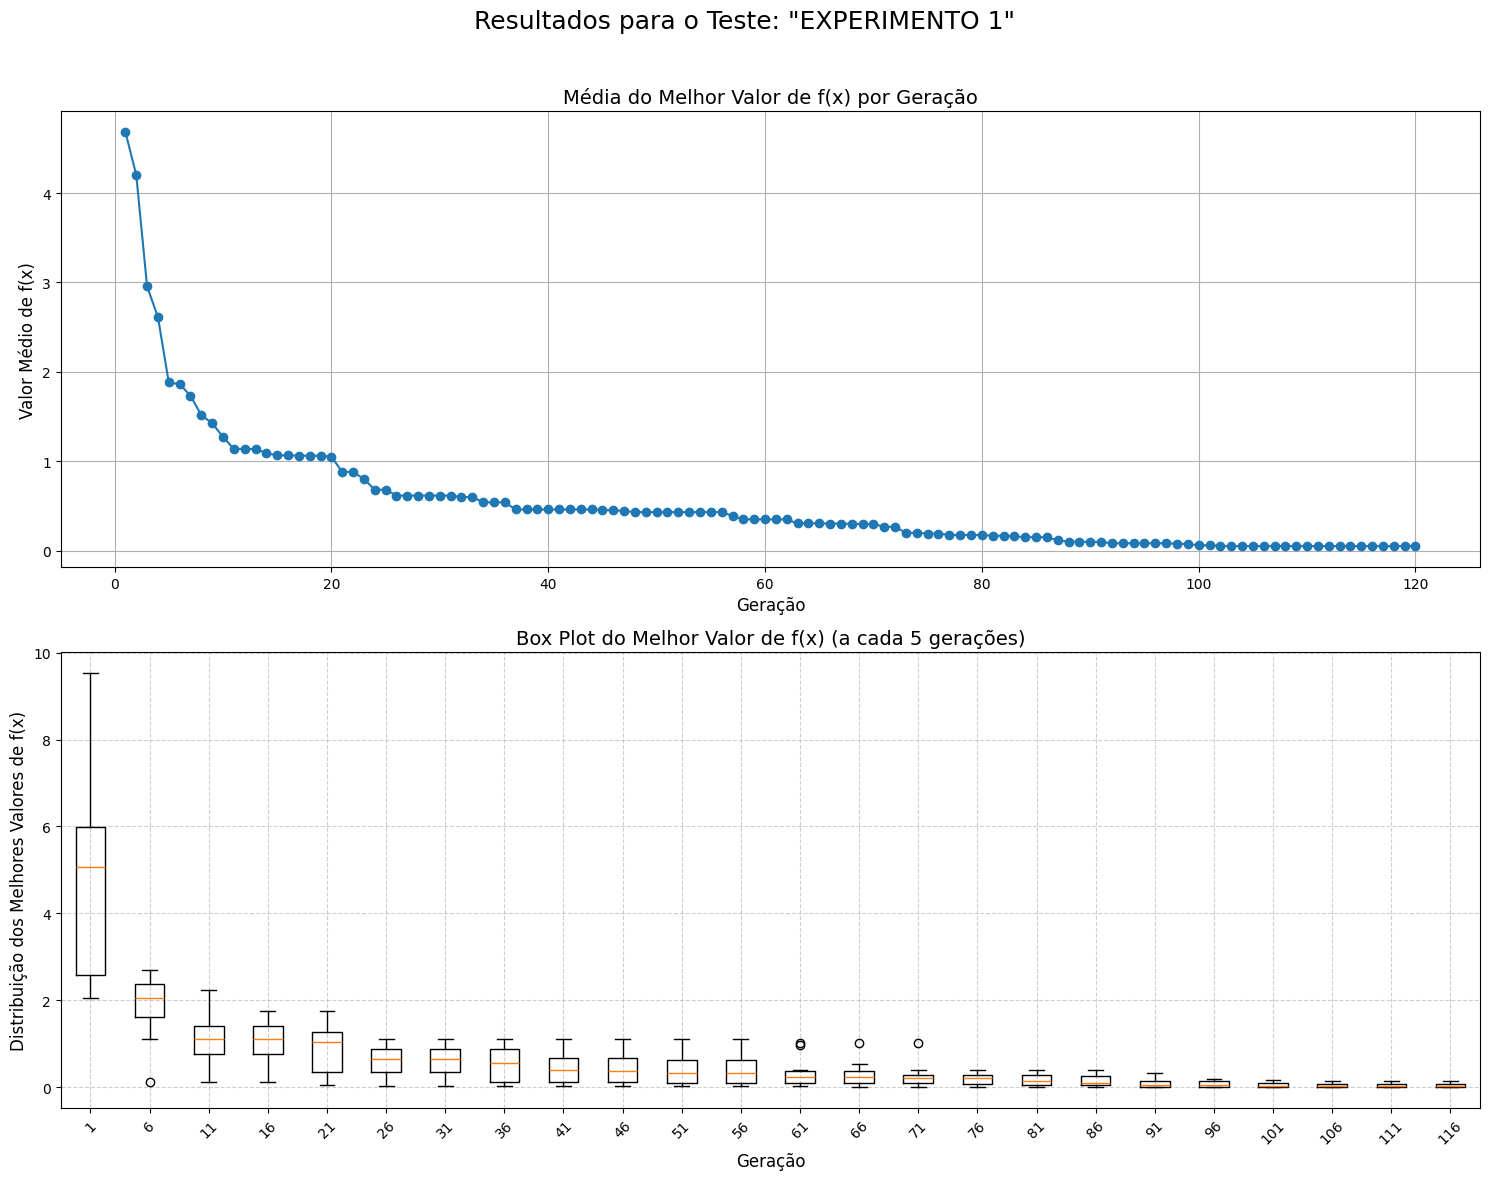

In [65]:
n_dimensao = 2
num_execucoes = 10

algorithm_param = {
    'max_num_iteration': 120,
    'population_size': 200,
    'mutation_probability': 0.01,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'tournament',
}

tabela_resultados_exp1 = executar_experimentos(
    algorithm_param=algorithm_param,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)

plotar_resultados_experimentos(tabela_resultados_exp1, "EXPERIMENTO 1")



In [66]:
tabela_resultados_exp1

,Experimento_1,Experimento_2,Experimento_3,Experimento_4,Experimento_5,Experimento_6,Experimento_7,Experimento_8,Experimento_9,Experimento_10
Geração,,,,,,,,,,
1,2.891764,9.525704,5.096190,5.234044,5.033031,2.056591,6.226826,2.470487,2.067753,6.235120
2,1.499228,9.525704,5.096190,3.867886,2.996197,2.056591,6.226826,2.470487,2.067753,6.235120
3,1.499228,6.531053,3.997932,3.867886,2.258394,2.056591,4.691033,2.470487,2.067753,0.117423
4,1.499228,5.696996,3.997932,2.233243,2.258394,1.104638,4.691033,2.470487,2.067753,0.117423
5,1.499228,2.030454,2.410922,2.233243,2.184120,1.104638,2.693632,2.470487,2.067753,0.117423
...,...,...,...,...,...,...,...,...,...,...
116,0.007648,0.026432,0.017098,0.114273,0.001679,0.147395,0.075068,0.069238,0.033529,0.002511
117,0.007648,0.026432,0.017098,0.114273,0.001679,0.147395,0.075068,0.069238,0.033529,0.002511
118,0.007648,0.026432,0.017098,0.114273,0.001679,0.147395,0.075068,0.069238,0.033529,0.002511


In [67]:
obter_melhor_resultado_geral(tabela_resultados_exp1)

{'score': 0.001678924182389352, 'experimento': 'Experimento_5'}

In [68]:
calcular_media_resultados_finais(tabela_resultados_exp1)

{'media': np.float64(0.049487222217214466),
 'desvio_padrao': 0.050448848321249885}

---
# Algoritmo genético - **configuração 2**
Será utilizado a configuração dos hiperparâmetros do GA como:
```python
algorithm_param = {
    'max_num_iteration': 120,                #Número de gerações
    'population_size': 200,                 #Tamanho da população

    'mutation_probability': 0.01,           #Probabilidade de mutação de 1%
    'mutation_type': 'gauss_by_x',          #Tipo de mutação 'gaussian' (creep)

    'crossover_probability': 0.65,          #Probabilidade de crossover de 65%
    'crossover_type': 'uniform',            #Tipo de crossover 'uniform'

    'elit_ratio': 0.10,                     #10% de elitismo (steady state)
    'parents_portion': 0.9,                 #90% da população pode ser selecionada como pais

    'selection_type': 'roulette',         #Seleção por torneio
}

# Foi alterado o modo de seleção para roulette obs: ele nao permite alterar a
# normalização, a biblioteca já aplica uma normalização padrão que não tem como altera-la.

# A remoção de duplicatas está incluída também porém se encontra em model.run()

Iniciando bateria de 10 experimentos com dimensão n=2...


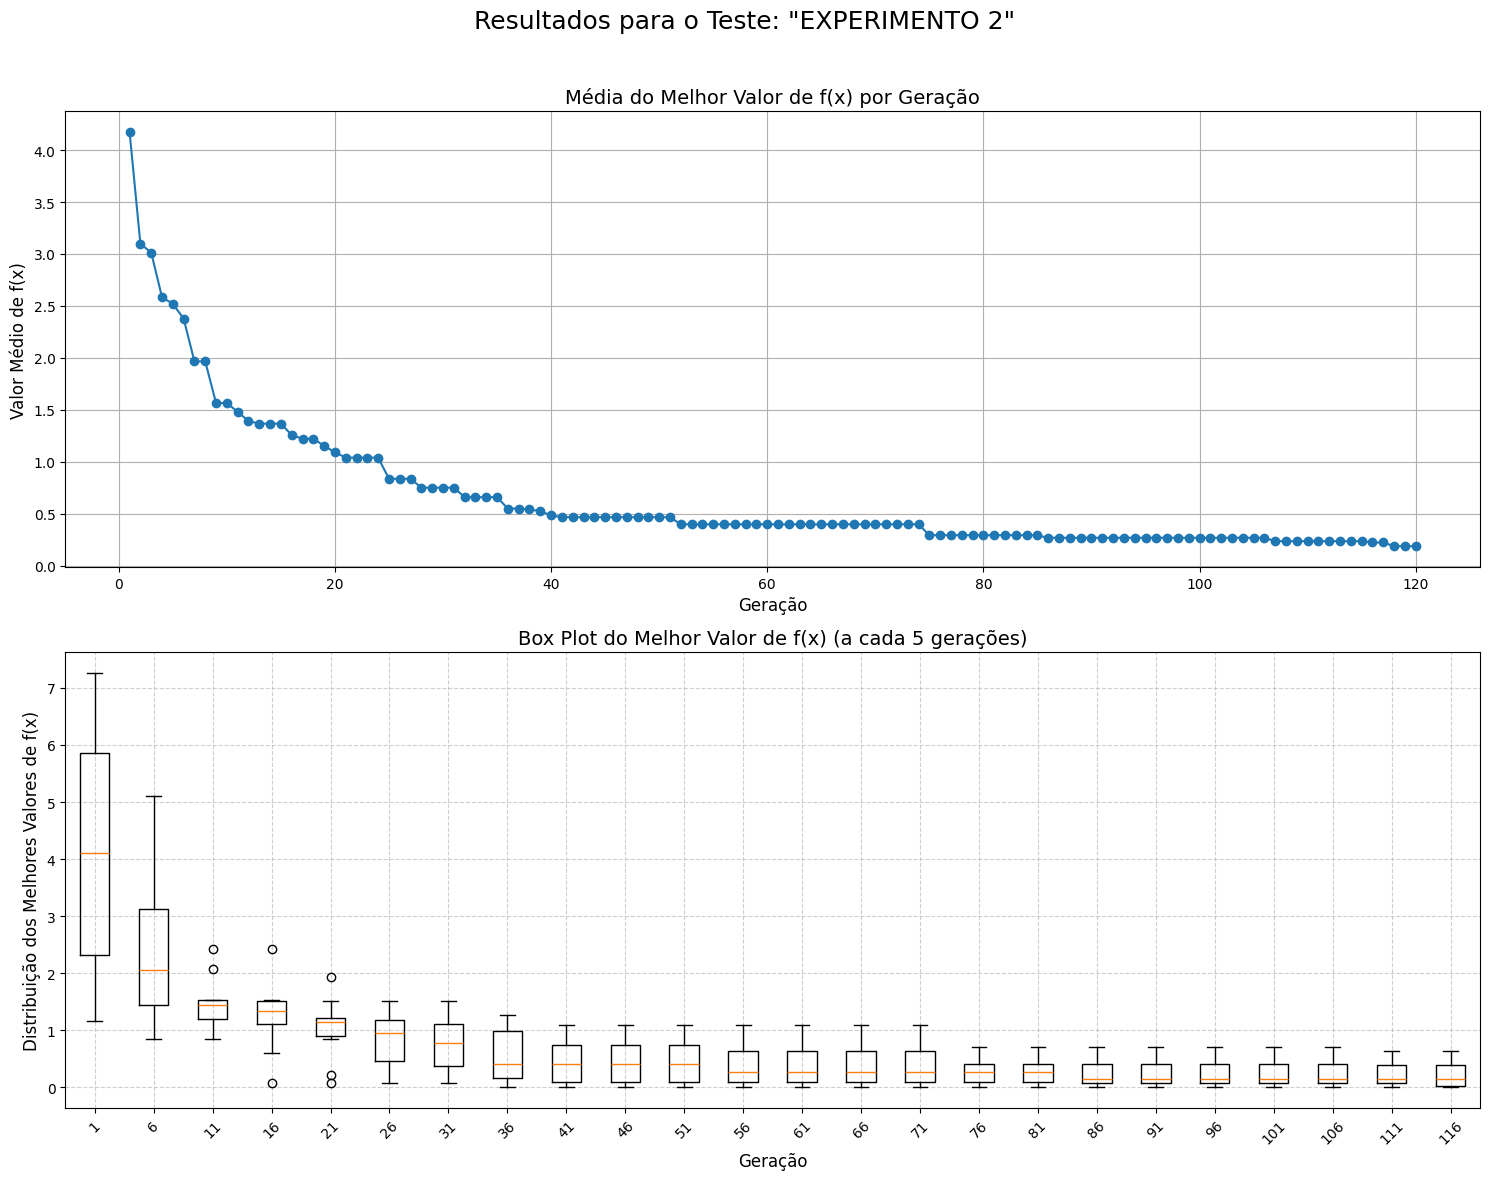

In [69]:
n_dimensao = 2
num_execucoes = 10

algorithm_param = {
    'max_num_iteration': 120,
    'population_size': 200,
    'mutation_probability': 0.01,
    'mutation_type': 'gauss_by_x',
    'crossover_type': 'uniform',
    'elit_ratio': 0.10,
    'parents_portion': 0.9,
    'selection_type': 'roulette',
}

tabela_resultados_exp2 = executar_experimentos(
    algorithm_param=algorithm_param,
    n_dim=n_dimensao,
    num_experimentos=num_execucoes
)

plotar_resultados_experimentos(tabela_resultados_exp2, "EXPERIMENTO 2")



In [70]:
tabela_resultados_exp2

,Experimento_1,Experimento_2,Experimento_3,Experimento_4,Experimento_5,Experimento_6,Experimento_7,Experimento_8,Experimento_9,Experimento_10
Geração,,,,,,,,,,
1,1.172426,1.435020,2.024440,7.256642,4.471186,5.991410,5.443034,3.194686,3.745842,7.002939
2,1.172426,1.435020,2.024440,3.472966,4.229112,3.850794,0.852421,3.194686,3.745842,7.002939
3,1.172426,1.435020,2.024440,3.472966,4.229112,3.850794,0.852421,2.351433,3.745842,7.002939
4,1.172426,1.435020,2.024440,1.462750,4.229112,3.850794,0.852421,2.351433,3.363531,5.098090
5,1.172426,1.435020,2.024440,1.462750,3.830622,3.850794,0.852421,2.106226,3.363531,5.098090
...,...,...,...,...,...,...,...,...,...,...
116,0.074808,0.418278,0.641539,0.009798,0.375111,0.118499,0.016571,0.002810,0.409498,0.165668
117,0.074808,0.418278,0.641539,0.009798,0.375111,0.118499,0.016571,0.002810,0.409498,0.165668
118,0.074808,0.302679,0.641539,0.009798,0.135196,0.118499,0.016571,0.002810,0.409498,0.165668


In [71]:
obter_melhor_resultado_geral(tabela_resultados_exp2)

{'score': 0.0028100273667739373, 'experimento': 'Experimento_8'}

In [74]:
calcular_media_resultados_finais(tabela_resultados_exp2)

{'media': np.float64(0.1877065547861445), 'desvio_padrao': 0.20663394388246756}

## Comparando configuração 2 com configuração 1 (caso base)

### Dedução do gráfico 1
$geração\ X\ média\ do\ valor\ de\ f(x)$

Comparando com o primeiro experimento (caso base - comparação) através do primeiro gráfico vemos que ele demora mais para convergir. Além disso através do boxplot, a configuração se demonstra menos concentrada em um valor.

OBS: PODE MUDAR - SOMENTE ESCREVER ESSE RESULTADO AO FINAL DE TODO O TRABALHO.

### Dedução do gráfico 2
$Distribuição\ dos\ melhores\ valores\ de\ f(x)\ X\ Boxplot\ do\ melhor\ valor\ de\ f(x)\ (a\ cada\ 5\ gerações)$

No Experimento 1, as caixas tornam-se muito curtas e achatadas mais rapidamente (a partir da Geração 36). Isto significa que a grande maioria das 10 execuções encontrou resultados muito similares e muito bons. O algoritmo é consistente e confiável.

No Experimento 2, as caixas são muito mais "altas" por muito mais tempo. Na Geração 36, por exemplo, a caixa ainda é bastante grande, indicando uma grande dispersão nos resultados. Alguns experimentos podem ter encontrado uma boa solução, mas outros ainda estavam com scores muito piores. O algoritmo é menos consistente e o resultado é menos previsível.

OBS: PODE MUDAR - SOMENTE ESCREVER ESSE RESULTADO AO FINAL DE TODO O TRABALHO.

### Dedução tabela (melhor resultado e média dos melhores)

In [72]:
obter_melhor_resultado_geral(tabela_resultados_exp2)

{'score': 0.0028100273667739373, 'experimento': 'Experimento_8'}

In [73]:
calcular_media_resultados_finais(tabela_resultados_exp2)

{'media': np.float64(0.1877065547861445), 'desvio_padrao': 0.20663394388246756}

# Comparando os resultados de todas configurações

Para comparar os resultados temos que levar em consideração:
1. Melhor resultado.
2. velocidade de convergência.
3. Distribuição dos experimentos (em média qual experimento é melhor?).
4. Gráfico de boxplot - ele mostra se o experimento é consistente e confiável.
Para interpretar o número 3 é necessário usar a média dos melhores resultados e o boxplot. O melhor resultado de todos não é a melhor decisão, pois ela pode ser fruto de uma população inicial favorável.

A interpretação deve levar em consideração principalmente a velocidade de convergência, pois em um projeto real, podemos não ter tanto tempo quanto se queira, levando a decidir o que convergiu mais rápido, mesmo que outra configuração leve em um resultado melhor.

## Melhor configuração

Explicação da melhor configuração, levando em consideração os 4 pontos acima.